<a href="https://colab.research.google.com/github/Somya000/Data-Science/blob/main/Future_Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import datetime
from sklearn import datasets
import pandas_datareader as web
from pandas_datareader import data
from pandas.io.formats.style_render import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
dataset = files.upload()

Saving ADANIPORTS.csv to ADANIPORTS.csv


In [ ]:
gstock_data = pd.read_csv('ADANIPORTS.csv')
gstock_data .head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
5,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.0,1049.00,1041.45,1015.39,4849250,4.923867e+14,NaN,1537667,0.3171
6,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.0,1084.00,1082.45,1082.79,2848209,3.084010e+14,NaN,904260,0.3175
7,2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.70,1051.0,1090.10,1081.30,1087.03,1749516,1.901771e+14,NaN,825691,0.4720
8,2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.00,1078.0,1100.00,1102.40,1106.57,2247904,2.487465e+14,NaN,697763,0.3104
9,2007-12-10,MUNDRAPORT,EQ,1102.40,1110.00,1110.00,1061.1,1073.55,1075.40,1080.38,1012350,1.093727e+14,NaN,417514,0.4124


In [ ]:
gstock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [ ]:
gstock_data = gstock_data[['Date','Open','Close']] # Extracting required columns
gstock_data['Date'] = pd.to_datetime(gstock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
gstock_data.set_index('Date',drop=True,inplace=True) # Setting date column as index
gstock_data.head()

<ipython-input-32-159522c21f0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gstock_data['Date'] = pd.to_datetime(gstock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date


,Open,Close
Date,,
2007-11-27,770.00,962.90
2007-11-28,984.00,893.90
2007-11-29,909.00,884.20
2007-11-30,890.00,921.55
2007-12-03,939.75,969.30


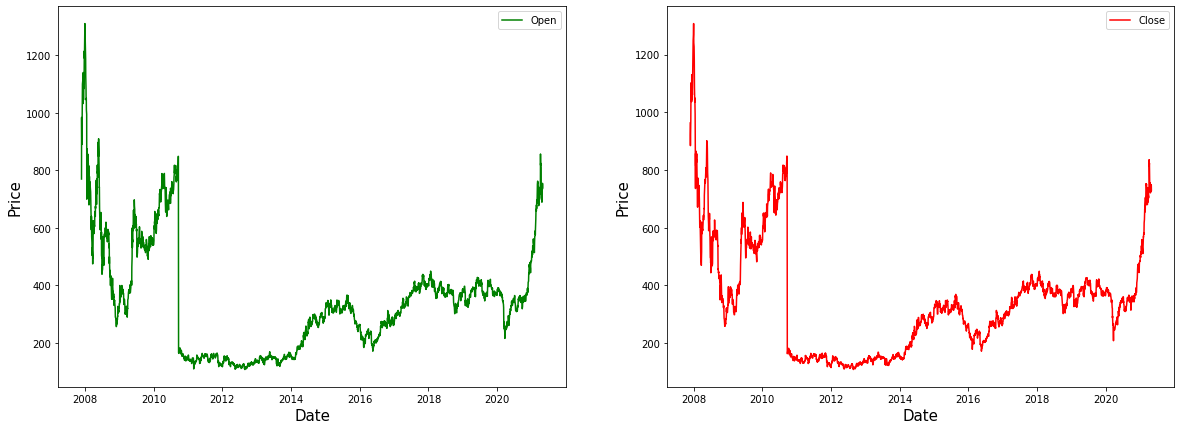

In [ ]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(gstock_data ['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(gstock_data ['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
gstock_data[gstock_data.columns] = MMS.fit_transform(gstock_data)

In [ ]:
training_size = round(len(gstock_data ) * 0.80)

In [ ]:
train_data = gstock_data [:training_size]
test_data  = gstock_data [training_size:]

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((2608, 50, 2), (2608, 2), (614, 50, 2), (614, 2))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
82/82 [==============================] - 9s 63ms/step - loss: 0.0039 - mean_absolute_error: 0.0334 - val_loss: 4.3958e-04 - val_mean_absolute_error: 0.0148
Epoch 2/80
82/82 [==============================] - 4s 52ms/step - loss: 0.0011 - mean_absolute_error: 0.0169 - val_loss: 7.4856e-04 - val_mean_absolute_error: 0.0227
Epoch 3/80
82/82 [==============================] - 4s 51ms/step - loss: 0.0010 - mean_absolute_error: 0.0171 - val_loss: 2.9669e-04 - val_mean_absolute_error: 0.0118
Epoch 4/80
82/82 [==============================] - 4s 51ms/step - loss: 7.7513e-04 - mean_absolute_error: 0.0139 - val_loss: 3.8796e-04 - val_mean_absolute_error: 0.0154
Epoch 5/80
82/82 [==============================] - 4s 52ms/step - loss: 7.1571e-04 - mean_absolute_error: 0.0139 - val_loss: 5.2655e-04 - val_mean_absolute_error: 0.0164
Epoch 6/80
82/82 [==============================] - 4s 52ms/step - loss: 6.7867e-04 - mean_absolute_error: 0.0131 - val_loss: 3.7183e-04 - val_mean_absolute_

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

20/20 [==============================] - 4s 28ms/step


array([[0.18770687, 0.1856483 ],
       [0.18574136, 0.18350758],
       [0.18475342, 0.18240535],
       [0.18978307, 0.18756428],
       [0.18923804, 0.18702428]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[333.6706 , 330.67584],
       [331.30756, 328.10815],
       [330.11978, 326.7861 ],
       [336.1667 , 332.974  ],
       [335.51144, 332.32626]], dtype=float32)

In [ ]:
gs_slic_data = pd.concat([gstock_data.iloc[-614:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=gstock_data.iloc[-614:].index)], axis=1)

In [ ]:
gs_slic_data[['Open','Close']] =MMS.inverse_transform(gs_slic_data[['Open','Close']]) # Inverse scaling

In [ ]:
gs_slic_data.head()

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2018-11-06,331.00,325.60,333.670593,330.675842
2018-11-07,329.00,326.20,331.307556,328.108154
2018-11-09,328.00,337.60,330.119781,326.786102
2018-11-12,339.00,328.65,336.166687,332.973999
2018-11-13,327.65,334.10,335.511444,332.326263


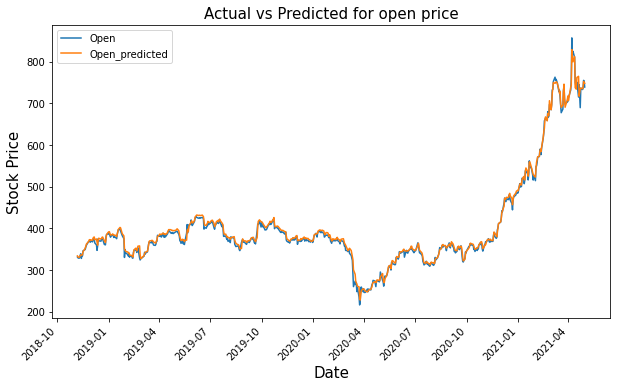

In [ ]:
gs_slic_data[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

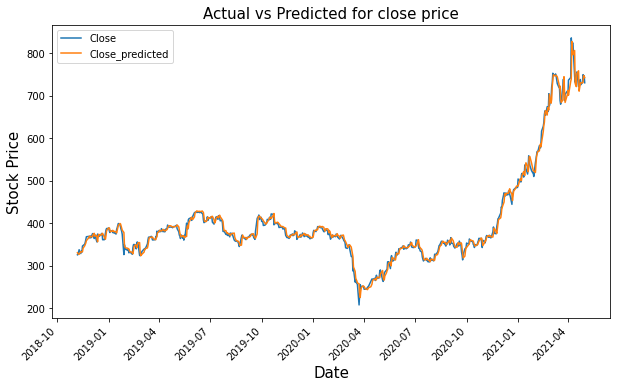

In [ ]:
gs_slic_data[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [ ]:
# Creating a dataframe and adding 10 days to existing index

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [ ]:
gs_slic_data['2021-04-15	':'2021-04-30']

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2021-04-15,735.90,750.35,733.972839,721.003418
2021-04-16,750.90,755.50,761.966370,751.610779
2021-04-19,715.00,720.95,764.790405,758.214233
2021-04-20,744.70,720.45,716.955872,710.334595
2021-04-22,689.50,737.80,733.999023,726.138794
2021-04-23,736.45,725.35,736.673401,730.580444
2021-04-26,733.00,730.75,734.938477,729.508179
2021-04-27,735.00,749.15,736.757507,731.309814
2021-04-28,755.00,746.25,752.403870,747.288696


In [ ]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 22ms/step


In [ ]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

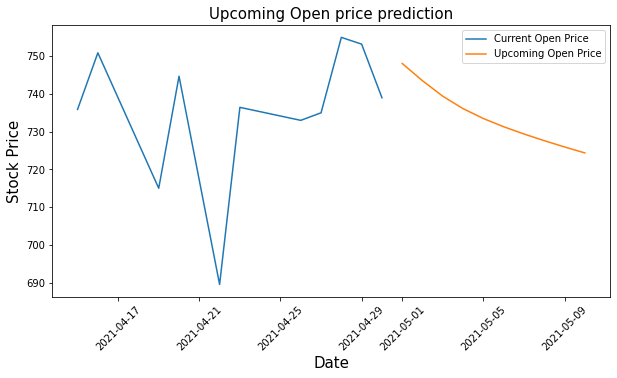

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-15':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

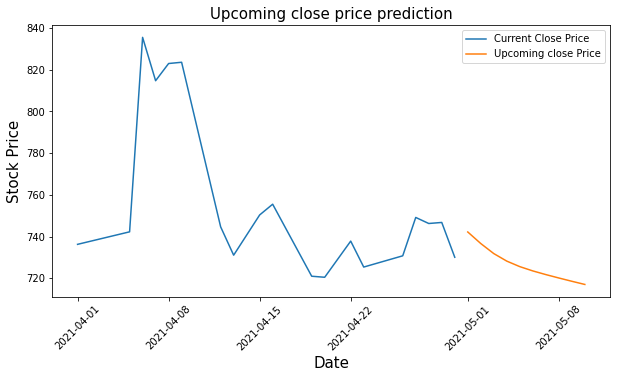

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()